In [54]:
import os

In [55]:
data_dir = '/Users/noahhallberg/Downloads/cell_images'


In [56]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
from matplotlib.image import imread

In [59]:
test_path = data_dir+'/test'
train_path = data_dir+'/train'

In [60]:
test_path

'/Users/noahhallberg/Downloads/cell_images/test'

In [61]:
os.listdir(test_path)

['.DS_Store', 'parasitized', 'uninfected']

In [62]:
os.listdir(train_path)

['.DS_Store', 'parasitized', 'uninfected']

In [63]:
os.listdir(train_path+'/parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [64]:
para_cell = train_path+'/parasitized/'+'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [65]:
para_cell

'/Users/noahhallberg/Downloads/cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

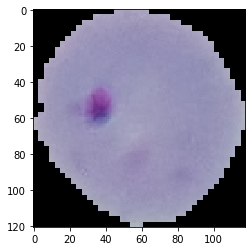

In [66]:
plt.imshow(imread(para_cell))

In [67]:
os.listdir(train_path+'/uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

In [68]:
uninfected_cell = train_path+'/uninfected/'+'C13NThinF_IMG_20150614_131318_cell_179.png'

In [69]:
uninfected_cell

'/Users/noahhallberg/Downloads/cell_images/train/uninfected/C13NThinF_IMG_20150614_131318_cell_179.png'

In [70]:
uninfected_cell = imread(uninfected_cell)

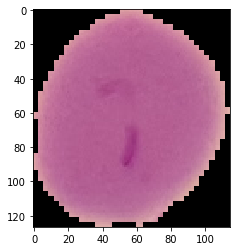

In [71]:
plt.imshow(uninfected_cell)

In [72]:
len(os.listdir(test_path+'/parasitized'))

1300

In [73]:
len(os.listdir(test_path+'/uninfected'))

1300

In [74]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
    
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

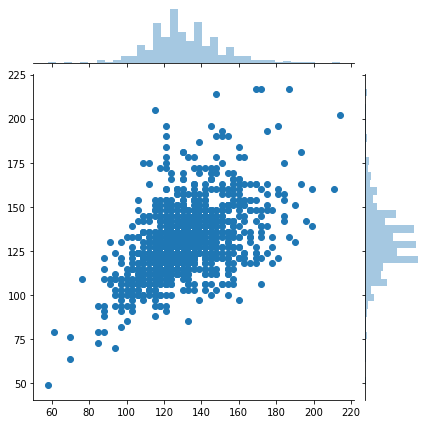

In [75]:
sns.jointplot(dim1,dim2)

In [76]:
np.mean(dim1)

130.92538461538462

In [77]:
np.mean(dim2)

130.75

In [78]:
image_shape = (130,130,3)

In [79]:
28*28

784

In [80]:
130*130*3

50700

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [82]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [83]:
imread(para_cell).max()

0.78039217

In [84]:
image_gen = ImageDataGenerator(rotation_range=20, #rotate the image 20 degrees
                              width_shift_range=0.1,#Randomly choose a value from 0 and 10% to shift the width of the image
                              height_shift_range=0.1, #Randomly choose a value from 0 and 10% to shift the height of the image
                              shear_range=0.1, #Cut a max of 10% off the image
                              zoom_range=0.1, #Zoom in by 10% max
                              horizontal_flip=True,
                              fill_mode='nearest') #fill in missing pixels with the nearest filled value

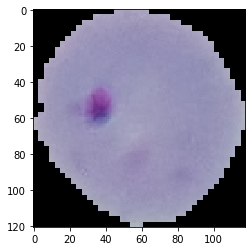

In [85]:
para_img = imread(para_cell)
plt.imshow(para_img)

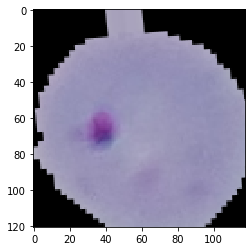

In [86]:
plt.imshow(image_gen.random_transform(para_img))

In [87]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [88]:
#directory info in jupyeter notebook

In [89]:
from tensorflow.keras.models import Sequential

In [90]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [91]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [95]:
batch_size=16

In [96]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(130,130),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [97]:

test_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(130,130),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 24958 images belonging to 2 classes.


In [98]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [99]:
#results = model.fit_generator(train_image_gen,epochs=20,
                             #validation_data=test_image_gen,
                             #callbacks=[early_stop])

In [100]:
from tensorflow.keras.models import load_model

In [101]:
model = load_model('malaria_detector.h5')

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [104]:
model.evaluate_generator(test_image_gen)

[1.8389135369647802, 0.8779149]

In [115]:
model.metrics_names

['loss', 'accuracy']

In [117]:
pred = model.predict_generator(test_image_gen)

In [126]:
predictions = pred > 0.80 #if 80% sure

In [127]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [128]:
len(pred)

24958

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     12479
           1       0.98      0.78      0.87     12479

    accuracy                           0.88     24958
   macro avg       0.90      0.88      0.88     24958
weighted avg       0.90      0.88      0.88     24958



In [132]:
confusion_matrix(test_image_gen.classes, predictions)

array([[12266,   213],
       [ 2799,  9680]])

In [133]:
para_cell

'/Users/noahhallberg/Downloads/cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [134]:
from tensorflow.keras.preprocessing import image

In [140]:
my_image = image.load_img(para_cell, target_size=image_shape)

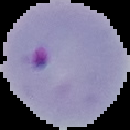

In [141]:
my_image

In [143]:
#model.summary()

In [148]:
my_img_arr = image.img_to_array(my_image)

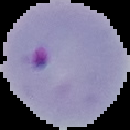

In [149]:
my_image

In [152]:
my_img_arr.shape #(1,130,130,3) one image

(130, 130, 3)

In [153]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [154]:
my_img_arr.shape

(1, 130, 130, 3)

In [155]:
model.predict(my_img_arr)

array([[0.]], dtype=float32)

In [157]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}